# Gentle Intro to Neural Network Architectures

Class,

Let's start simple and view a small-scale model first which we'll later generalize and scale-up to real-world levels.

The basic units of an ANN (artificial neural net) are: <p>

- (a) artificial neurons as nodal processing units, which are arranged in 
- (b) 1-D (later 2-D and 3-D as well) *layers* such as the input layer, hidden layers and the output layer,
- (c) an activation function (e.g., Sigmoid, ReLu, tanH etc) in each node that processes input signal into transformed output, and
- (d) a feedback loop that uses prediction error to progressively optimize activation function weights layer by layer *backwards*.

Starting as usual with the setup step.

In [3]:
# setup chunk
!pip install mglearn
!pip install graphviz
import mglearn
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression

%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
import time

## A Basic ANN's Structure 

Consider a simple linear model with i=1,2...n inputs `x[i]`, each associated with linear weights `w[i]` and having the structure: <p>

`y_hat = w[0]*x[0] + w[1]*x[1]+...w[n]*x[n]`

To estimate the above, consider below a basic ANN structure which has the following components:<p>

- One, an input *layer* of artificial neurons or **nodes** with input feature `x[i]` for node i<p>

- Two, an output node for predicted outcome `y_hat` <p>

- Three, connections between the input nodes and the output node, for `w[i]`.<p>

Thus, input layer's nodes take in input `x`, process and transform them using weights `w` and output them to `y_hat`. See the first figure below.


### Slides for an Intro to ANN structure

let's head briefly to the slides where I demo 3 things:<p>

- A Multi Layer Perceptron (MLP) ANN model without any hidden layers<p>
    
- MLP with 1 hidden layer<p>

- MLP with 2 hidden layers<p>
    
The next two ANNs for demo purposes have 1 and 2 hidden neuron layers, all *densely* connected to the neurons in the next layer.

Note that all arrows of info and processing flow point only forward, so these are also called *feed-forward neural networks*. 

The second ANN has many more coeffs to learn since there are now so many more connections in the system. 

However, tinkering with the weights or coeffs can only get us so much in terms of complex shape capture. 

To really approximate arbitrary shaped functions, we need a layer of nonlinearities to come in. Enter, **activation functions**.    
    
### Activation functions

After computing a weighted sum for each hidden unit or node, a non-linear function called an *activation function* is applied to the result.

The most common activation functions are the: <p>
- (i) rectifying Linear Unit (or ReLU) in the range (0,), <p>
- (ii) the sigmoid in range (0,1) and <p>
- (iii) the tangent Hyperbolic function in the range (-1,1).<p>

The code below plots these activation func    

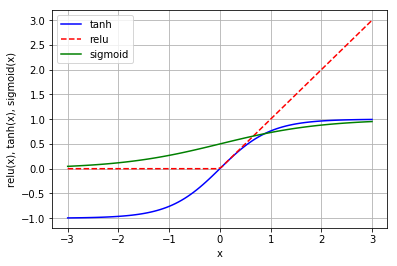

In [5]:
line = np.linspace(-3, 3, 100)
sigmoid1 = 1/(1+np.exp(-1*line))  # defining sigmoid func

# plot
plt.plot(line, np.tanh(line), 'b-', label="tanh")  # tanH func
plt.plot(line, np.maximum(line, 0), 'r--', label="relu")  # reLU func
plt.plot(line, sigmoid1, 'g-', label="sigmoid")  # sigmoid

plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x), sigmoid(x)")
plt.grid(True)
plt.show()

The activation funcs allow ANNs to learn much more complicated funcs than a linear model could.

### Basic ANN on simulated data

We start below by simulating dummy data for a classifier as previously done. Then we will compare how well plain vanilla MLPs do against plain vanilla ML algos. Behold.

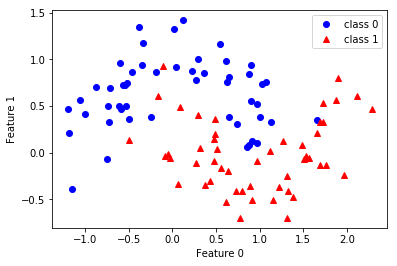

In [6]:
# Tuning Neural Networks
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# simulate dataset
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

# view dataset plot
plt.plot(X[(y==0),0], X[(y==0),1], 'bo', label="class 0")
plt.plot(X[(y==1),0], X[(y==1),1], 'r^', label="class 1")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend()
plt.show()

Well, what does the data look like? Wavy? What might a separation boundary be shaped like? Will linear estimators do well? Etc.

## Invoking the MultiLayer Perceptron (MLP)

Sklearn's MLP class allows us to setup, tweak and run a simple MLP on simulated data. We need to specify a solver (I use *l-bfgs*).

Below, I split the data in a stratified way and plot the decision boundary the MLP finds using mglearn inbuilt funcs. Behold.


In [7]:
# stratified train-test-split with set random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# invoke, instantiate and fit to data the MLP classifier
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)

# view the defaulty specs of the mlp instance we just specified
print(mlp, "\n")

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False) 



Notice that by default, an MLP will have 1 hidden layer of size 100 (sizes could vary from small like 10 to very large like in the 1000s).

We'll come to the other tuning parms in good time. 

Next let's plot and see the decision boundary the MLP captures. And compare that with what a 'regular' classifier does.

MLP Training set score:  0.987 

MLP Test set score:  0.88 

LogReg Training set score:  0.853 

LogReg Test set score:  0.8 



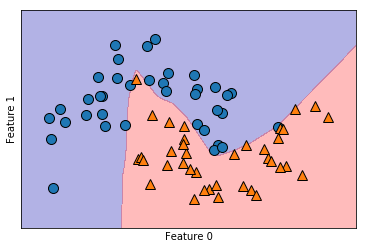

In [8]:
# use mglearn plots to visualize results
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# eval MLP perf
print("MLP Training set score: ", round(mlp.score(X_train, y_train), 3), "\n")
print("MLP Test set score: ", round(mlp.score(X_test, y_test), 3), "\n")

from sklearn.linear_model import LogisticRegression
# Compare perf with the logReg classifier
logreg = LogisticRegression(random_state=0).fit(X_train, y_train)
print("LogReg Training set score: ", round(logreg.score(X_train, y_train), 3), "\n")
print("LogReg Test set score: ", round(logreg.score(X_test, y_test), 3), "\n")

Three quick points to make here based on results above.

- Firstly, reg the decision boundary wala plot, notice the sorta complex shape the simple, single layer MLP could catch?  Imagine what ANNs might do with more neurons per layers and more layers per net?<p>

- Secondly, A 10 percentage point difference between train and test in MLP? Smells like overfitting. So maybe, given our tiny dummy dataset size, the default num_nodes of 100 in the input layer was a tad too much? 
Why not reduce model complexity by bringing down this number? That's where we're headed to next.<p>

- Third, our workhorse linear classifier model from old - LogReg - performs significantly worse than even the most basic ANN?<p>

### Decreasing the num_nodes

new MLP Training set score:  0.987 

new MLP Test set score:  0.88 



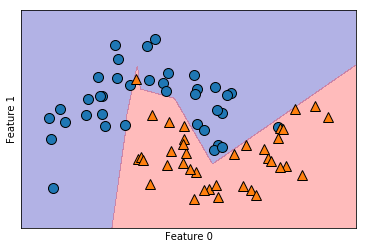

In [9]:
# new num_nodes=10 from 100 previously in the hidden layer
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# eval new MLP perf
print("new MLP Training set score: ", round(mlp.score(X_train, y_train), 3), "\n")
print("new MLP Test set score: ", round(mlp.score(X_test, y_test), 3), "\n")

The new MLP decision boundary looks more ragged than with 100 neurons. 10 neurons in the single hidden layer means there are effectively 10 line segments comprising the decision boundary in this case.

What happens if we *deepen* the ANN by adding another hidden layer? Let's find out in this simple example.

### Adding a hidden layer

new MLP Training set score:  0.987 

new MLP Test set score:  0.84 



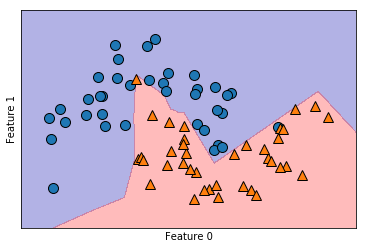

In [10]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)

# plot above
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# eval new MLP perf
print("new MLP Training set score: ", round(mlp.score(X_train, y_train), 3), "\n")
print("new MLP Test set score: ", round(mlp.score(X_test, y_test), 3), "\n")

Adding a hidden layer here seems to overfit and generalize poorly to the test set.

So maybe its time to reduce model complexity. One option is using the L2 regularization parm `alpha` (same as in LogReg). 

### Adding Regularization to simplify the MLP model

The default is `alpha` = 0.0001 (almost no regularization) and we'll bump it up to 0.01. 

Behold results now.

In [12]:
# Using two hidden layers of [10, 10] units size & regularizing with alpha=0.01
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10], alpha=0.01)
mlp.fit(X_train, y_train)

# eval new MLP perf
print("new MLP Training set score: ", round(mlp.score(X_train, y_train), 3), "\n")
print("new MLP Test set score: ", round(mlp.score(X_test, y_test), 3))

new MLP Training set score:  0.987 

new MLP Test set score:  0.88


### Trying a different Activation Func

How much would a change in acivation func affect results such as the decision boundary?

Why not try say, tanh and see? Behold.

Text(0,0.5,'Feature 1')

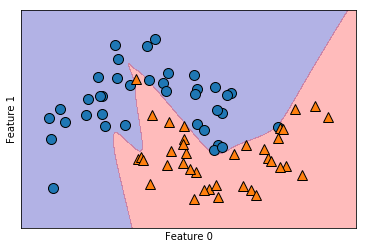

In [13]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity.
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])

mlp.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Unlike the default ReLU, tanH extends all the way below zero to -1 and therefore penalizes deviations more strongly than ReLU does. The resulting decision boundary as can be seen is sharper and more closed in than before.

BTW, nothing stopping you from trying different alpha or other tuning parms, BTW.

Below I demo how decision boundaries vary with num_nodes & alpha parm. 

Behold.

19.71  secs


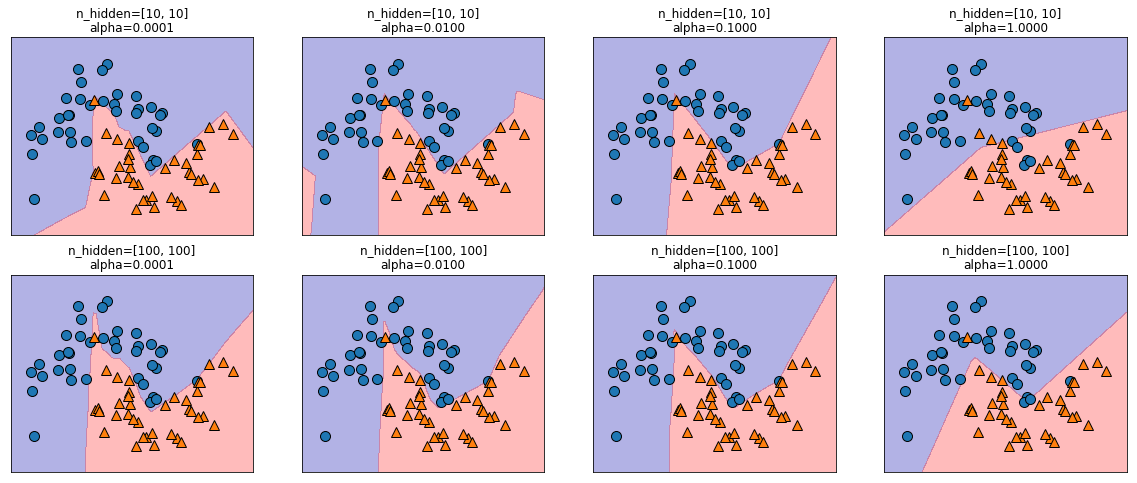

In [15]:
start = time.time()
# 2x4 subplots with varying num_nodes and alpha
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# vary num_nodes in hidden layers here
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    
    # vary alpha from 0.001 to 1 in 10x steps
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        
        # import vals above into MLP classifier
        mlp = MLPClassifier(solver='lbfgs', random_state=0, max_iter=500,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        
        mlp.fit(X_train, y_train)
        
        # plot decision boundary
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

end = time.time()
print(round(end - start, 2), " secs")

## Issues with ANNs

Like everything else out there, ANNs have their issues. here's a short list.

- 1. **Random initialization** of weights means unless random seed is set, differen runs can lead to different solutions (akin to k-means, for example).<p>

- 2. **Scale Sensitivity** in ANNs is high. Data must be carefully preprocessed and scaled to mean=0, variance=1 for all features (like in SVMs).<p>

- 3. **Weight interpretation** is tricky and oft infeasible in *deep* networks with large num_nodes per layer. <p>

- 4. **Time-consuming**. Training large and deep networks requires massive data hoards and takes relatively long. Hardware accelerators (Graphical Processing units or GPUs) have ridden to the rescue by upscaling speeds by 10x-100x. Still, resource intensive.<p>

- 5. **Parameter tuning** - the number of parms in complex ANNs is v high. Tuning them is still more of an art than a science and tuning affects perf substantially.<p>

Chalo, back to the slides for now.

Voleti.